<a href="https://colab.research.google.com/github/nbegumc/Public-Opinion-on-News/blob/main/PublicOpinionOnNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dataset from Kaggle**

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazlbe","key":"91a835680d578840698c3fa308f3eaee"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d aashita/nyt-comments

 97% 466M/480M [00:03<00:00, 140MB/s]
100% 480M/480M [00:03<00:00, 139MB/s]


In [5]:
!unzip nyt-comments

Archive:  nyt-comments.zip
  inflating: ArticlesApril2017.csv   
  inflating: ArticlesApril2018.csv   
  inflating: ArticlesFeb2017.csv     
  inflating: ArticlesFeb2018.csv     
  inflating: ArticlesJan2017.csv     
  inflating: ArticlesJan2018.csv     
  inflating: ArticlesMarch2017.csv   
  inflating: ArticlesMarch2018.csv   
  inflating: ArticlesMay2017.csv     
  inflating: CommentsApril2017.csv   
  inflating: CommentsApril2018.csv   
  inflating: CommentsFeb2017.csv     
  inflating: CommentsFeb2018.csv     
  inflating: CommentsJan2017.csv     
  inflating: CommentsJan2018.csv     
  inflating: CommentsMarch2017.csv   
  inflating: CommentsMarch2018.csv   
  inflating: CommentsMay2017.csv     


In [6]:
# checking whether all the files have been downloaded to the directory
!ls

ArticlesApril2017.csv  ArticlesMarch2018.csv  CommentsJan2018.csv
ArticlesApril2018.csv  ArticlesMay2017.csv    CommentsMarch2017.csv
ArticlesFeb2017.csv    CommentsApril2017.csv  CommentsMarch2018.csv
ArticlesFeb2018.csv    CommentsApril2018.csv  CommentsMay2017.csv
ArticlesJan2017.csv    CommentsFeb2017.csv    kaggle.json
ArticlesJan2018.csv    CommentsFeb2018.csv    nyt-comments.zip
ArticlesMarch2017.csv  CommentsJan2017.csv    sample_data


In [7]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import string
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
import glob
os.chdir("/content")

In [9]:
extension = 'csv'
all_articles = [i for i in glob.glob('Articles*'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_articles ])
combined_csv.to_csv( "articles.csv", index=False, encoding='utf-8-sig')

In [10]:
all_comments = [i for i in glob.glob('Comments*'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f,low_memory=False) for f in all_comments ])
combined_csv.to_csv( "comments.csv",index=False, encoding='utf-8-sig')

In [11]:
articles = pd.read_csv('articles.csv')
comments = pd.read_csv('comments.csv',low_memory=False)

# **Data Exploration**

**Articles**

In [12]:
articles.shape, articles.columns

((9335, 16),
 Index(['articleID', 'byline', 'documentType', 'headline', 'keywords',
        'multimedia', 'newDesk', 'printPage', 'pubDate', 'sectionName',
        'snippet', 'source', 'typeOfMaterial', 'webURL', 'articleWordCount',
        'abstract'],
       dtype='object'))

In [13]:
articles.head(3)

,articleID,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,articleWordCount,abstract
0,5a974697410cf7000162e8a4,By BINYAMIN APPELBAUM,article,"Virtual Coins, Real Resources","['Bitcoin (Currency)', 'Electric Light and Pow...",1,Business,1,2018-03-01 00:17:22,Economy,America has a productivity problem. One explan...,The New York Times,News,https://www.nytimes.com/2018/02/28/business/ec...,1207,NaN
1,5a974be7410cf7000162e8af,By HELENE COOPER and ERIC SCHMITT,article,U.S. Advances Military Plans for North Korea,"['United States Defense and Military Forces', ...",1,Washington,11,2018-03-01 00:40:01,Asia Pacific,The American military is looking at everything...,The New York Times,News,https://www.nytimes.com/2018/02/28/world/asia/...,1215,NaN
2,5a9752a2410cf7000162e8ba,By THE EDITORIAL BOARD,article,Mr. Trump and the ‘Very Bad Judge’,"['Trump, Donald J', 'Curiel, Gonzalo P', 'Unit...",1,Editorial,26,2018-03-01 01:08:46,Unknown,Can you guess which man is the model public se...,The New York Times,Editorial,https://www.nytimes.com/2018/02/28/opinion/tru...,1043,NaN


In [14]:
articles.isna().sum()

articleID              0
byline                 0
documentType           0
headline               0
keywords               0
multimedia             0
newDesk                0
printPage              0
pubDate                0
sectionName            0
snippet                0
source                 0
typeOfMaterial         0
webURL                 0
articleWordCount       0
abstract            9168
dtype: int64

In [15]:
# dropping the 'abstract' column
articles=articles.drop(['abstract'],axis=1)

In [16]:
articles.newDesk.value_counts(),articles.sectionName.value_counts()

(OpEd               1719
 National            630
 Metro               593
 Learning            575
 Foreign             514
 Culture             507
 Business            407
 Magazine            386
 Washington          378
 Dining              366
 Games               357
 Well                342
 Editorial           333
 Sports              332
 Science             284
 Upshot              230
 RealEstate          225
 Insider             154
 Weekend             140
 Unknown             117
 Travel              112
 Arts&Leisure         71
 BookReview           62
 Styles               60
 Metropolitan         57
 SundayBusiness       57
 Podcasts             40
 Photo                39
 NewsDesk             32
 Smarter Living       31
 Climate              31
 Investigative        28
 Obits                22
 Politics             22
 Express              19
 SpecialSections      18
 TStyle               14
 EdLife               11
 Letters               5
 NYTNow                4


In [17]:
columns_to_drop= ["source" , "multimedia","documentType","typeOfMaterial","webURL","byline","headline"]
articles=articles.drop(columns=columns_to_drop)
articles.head(5)

,articleID,keywords,newDesk,printPage,pubDate,sectionName,snippet,articleWordCount
0,5a974697410cf7000162e8a4,"['Bitcoin (Currency)', 'Electric Light and Pow...",Business,1,2018-03-01 00:17:22,Economy,America has a productivity problem. One explan...,1207
1,5a974be7410cf7000162e8af,"['United States Defense and Military Forces', ...",Washington,11,2018-03-01 00:40:01,Asia Pacific,The American military is looking at everything...,1215
2,5a9752a2410cf7000162e8ba,"['Trump, Donald J', 'Curiel, Gonzalo P', 'Unit...",Editorial,26,2018-03-01 01:08:46,Unknown,Can you guess which man is the model public se...,1043
3,5a975310410cf7000162e8bd,"['China', 'Xi Jinping', 'Term Limits (Politica...",Foreign,1,2018-03-01 01:10:35,Asia Pacific,Censors swung into action after Mr. Xi’s bid t...,1315
4,5a975406410cf7000162e8c3,"['Kushner, Jared', 'Kushner Cos', 'United Stat...",Business,1,2018-03-01 01:14:41,Unknown,"Apollo, the private equity firm, and Citigroup...",1566


**Comments**

In [18]:
comments.shape

(2176364, 34)

In [19]:
comments.head(3)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1524345065,5adb8334068401528a2a9f74,1571.0,"""While Mr. Trump talks a lot about the problem...",26824181.0,26824181.0,<br/>,comment,1.524345e+09,1.0,0,0.0,Editorial,0.0,NaN,26824181,https://graphics8.nytimes.com/images/apps/time...,10.0,0.0,NaN,0.0,NaN,Sunday Review,0,approved,0.0,0.0,Editorial,1524345065,Richard Blaine,82512919.0,Not NYC,NaN,NaN
1,1524343706,5adb8334068401528a2a9f74,1571.0,"From my perspective here in Silicon Valley, pa...",26824061.0,26824061.0,<br/>,comment,1.524344e+09,1.0,0,0.0,Editorial,0.0,NaN,26824061,https://graphics8.nytimes.com/images/apps/time...,10.0,1.0,NaN,0.0,NaN,Sunday Review,0,approved,1.0,0.0,Editorial,1524343706,Trista,12815695.0,California,NaN,NaN
2,1524340874,5adb8334068401528a2a9f74,1571.0,The most important first step political leader...,26823921.0,26823921.0,<br/>,comment,1.524341e+09,1.0,0,0.0,Editorial,0.0,NaN,26823921,https://graphics8.nytimes.com/images/apps/time...,10.0,2.0,NaN,0.0,NaN,Sunday Review,0,approved,1.0,0.0,Editorial,1524340874,NM,40118532.0,NY,NaN,NaN


In [20]:
comments.info(verbose=True) #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176364 entries, 0 to 2176363
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   approveDate            int64  
 1   articleID              object 
 2   articleWordCount       float64
 3   commentBody            object 
 4   commentID              float64
 5   commentSequence        float64
 6   commentTitle           object 
 7   commentType            object 
 8   createDate             float64
 9   depth                  float64
 10  editorsSelection       int64  
 11  inReplyTo              float64
 12  newDesk                object 
 13  parentID               float64
 14  parentUserDisplayName  object 
 15  permID                 object 
 16  picURL                 object 
 17  printPage              float64
 18  recommendations        float64
 19  recommendedFlag        float64
 20  replyCount             float64
 21  reportAbuseFlag        float64
 22  sectionName       

In [21]:
comments.isna().sum()

approveDate                    0
articleID                      0
articleWordCount               0
commentBody                    0
commentID                      0
commentSequence                0
commentTitle               76803
commentType                    0
createDate                     0
depth                          0
editorsSelection               0
inReplyTo                      0
newDesk                        0
parentID                       0
parentUserDisplayName    1596067
permID                        22
picURL                         0
printPage                      0
recommendations                0
recommendedFlag          2176364
replyCount                     0
reportAbuseFlag          2176364
sectionName               149613
sharing                        0
status                         0
timespeople                    0
trusted                        0
typeOfMaterial                 0
updateDate                     0
userDisplayName              677
userID    

In [22]:
columns_to_drop= ["commentTitle","parentID", "parentUserDisplayName","permID","picURL", "recommendedFlag","reportAbuseFlag","userTitle","userURL",
                  "userDisplayName","userLocation","timespeople","trusted","sharing","status","depth","commentType","commentSequence",
                  "typeOfMaterial","articleWordCount","printPage"]
comments=comments.drop(columns=columns_to_drop)

In [23]:
comments.isna().sum()
#sectionName NaN s should be replaced with "unknown"s.

approveDate              0
articleID                0
commentBody              0
commentID                0
createDate               0
editorsSelection         0
inReplyTo                0
newDesk                  0
recommendations          0
replyCount               0
sectionName         149613
updateDate               0
userID                   0
dtype: int64

In [24]:
comments['sectionName']=comments['sectionName'].replace(np.nan, 'Unknown')

In [25]:
comments['sectionName'].isna().sum()

0

In [26]:
## change date format
date_columns=['approveDate','createDate','updateDate']

for date_column in date_columns:
    comments[date_column]=comments[date_column].apply(lambda x:datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

# **IMPORTING THE NECESSARY LIBRARIES**

In [27]:
import re
from string import digits

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

In [30]:
nltk.download("wordnet") 
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [31]:
from gensim.models.phrases import Phrases
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [32]:
stopwords_en = []
with open('/content/stopwords-en.txt', "r", errors = 'ignore') as f:
    for line in csv.reader(f, delimiter='\n'):
        stopwords_en.extend(line)

# **TEXT PREPROCESSING**

**Filtering comments receving at least one reply**

In [33]:
np.where(comments['replyCount']>0,1,0).sum(),np.where(comments['replyCount']<0,1,0).sum(),np.where(comments['replyCount']==0,1,0).sum()

(387009, 13, 1789342)

In [34]:
# leave only commments with replyCount>0
comments_with_replies=comments[comments.replyCount>=1]

In [35]:
comments_with_replies.describe()

,commentID,editorsSelection,inReplyTo,recommendations,replyCount,userID
count,3.870090e+05,387009.000000,3.870090e+05,387009.000000,387009.000000,3.870090e+05
mean,2.373593e+07,0.072518,5.159994e+05,70.841846,2.449354,4.945381e+07
std,2.233788e+06,0.259344,3.659858e+06,235.716914,4.843996,2.353426e+07
min,2.096381e+07,0.000000,0.000000e+00,0.000000,1.000000,1.166000e+03
25%,2.170632e+07,0.000000,0.000000e+00,4.000000,1.000000,3.209025e+07
50%,2.248826e+07,0.000000,0.000000e+00,11.000000,1.000000,5.707682e+07
75%,2.617901e+07,0.000000,0.000000e+00,36.000000,2.000000,6.746925e+07
max,2.694099e+07,1.000000,2.694028e+07,10472.000000,668.000000,8.585404e+07


In [36]:
comments_with_replies['recommendations'].median(),comments_with_replies['recommendations'].mean()

(11.0, 70.8418460552597)

In [37]:
np.where(comments_with_replies['recommendations']>comments_with_replies['recommendations'].mean(),1,0).sum()

63283

In [38]:
comments_with_replies['editorsSelection'].value_counts()

0    358944
1     28065
Name: editorsSelection, dtype: int64

In [39]:
comments_with_replies.shape

(387009, 13)

In this study, comments which have **recommendations greater than the mean number of recommendations** and  \

**replycounts greater than the average replycount** will be considered **successful**, and will be labelled as 1.

In [53]:
### create response classes:

comments_with_replies['binary_class'] = np.where((comments_with_replies['recommendations']>comments_with_replies['recommendations'].mean())&
                                    (comments_with_replies['replyCount']>comments_with_replies['replyCount'].mean()), 1, -1)
# 1 if successful, -1 otherwise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# data frame which will be used for classification:

In [54]:
training_comments = pd.DataFrame({'binary_class' : comments_with_replies['binary_class'],
                                    "commentBody" : comments_with_replies['commentBody']})

In [55]:
training_comments

,binary_class,commentBody
4,-1,Under contract with the Democratic National Co...
12,-1,"I remember, soon after the death of Yeltzin, w..."
31,-1,Are there any Republicans who aren’t loathsome...
53,-1,This time I decided to take a stab at the Pand...
69,-1,"Nobody wants to live next to an Airbnb, and th..."
...,...,...
2147659,-1,"Hi James, Just to be clear.<br/>If I make an i..."
2150952,-1,"A forgiven loan is income to the borrower, and..."
2150975,-1,I would double check this - I am in the PSLF p...
2150979,-1,Thanks for your reply and for bringing your ea...


In [56]:
training_comments.binary_class.value_counts()

-1    355181
 1     31828
Name: binary_class, dtype: int64

In [ ]:
# separate dataframe for successful comments
successful_comments=training_comments[training_comments.binary_class>=1]

In [ ]:
successful_comments.shape

(31828, 2)

# **CLEANING COMMENTS**

**PREPROCESSING THE TEXT  &  TOKENIZATION**

Defining the functions

In [57]:
def remove_linebreaks(text):
   try: ## <br/>
        for f in set(re.findall('\<.*?\>', text)):
            text=text.replace(f,' ')
   except:
     text=text.strip()
   
   return text

def remove_punctuation(text):
    clean_text=text.translate(str.maketrans('', '', string.punctuation))
    return clean_text
    
def remove_punctuation_and_digits(text):
    clean_text=text.translate(str.maketrans('', '', string.punctuation)).translate(str.maketrans('', '', digits))
    return clean_text

def clean_tokenized_text(text_column): #text_column = clean_text
    comment_text = [str(comment).lower() for comment in text_column] #
    correct_text_tokenized_=[token for token in [comment.split() for comment in comment_text]]
    return correct_text_tokenized_

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  
  pos_tagged = list(nltk.pos_tag(text))
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
 
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:       
      lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
      
 
  return lemmatized_sentence



In [93]:
# this function can be used to create bigrams

def tokenized_bigram_no_stopwords(tokenized_text,stopwords_list,unique_string = False): 
    bigram_model=Phrases(tokenized_text)# to create the bigrams

    correct_text_tokenized_bigram = []
    for unigram_sentence in tokenized_text:
        correct_text_tokenized_bigram.append(bigram_model[unigram_sentence]) 
    if unique_string == False:
        correct_text_tokenized_bigram_no_stopwords = [[word for word in tweet if word not in stopwords_list] for tweet in correct_text_tokenized_bigram]
    else:
        correct_text_tokenized_bigram_no_stopwords = [' '.join([word for word in tweet if word not in stopwords_list]) for tweet
                                                        in correct_text_tokenized_bigram]

    return correct_text_tokenized_bigram_no_stopwords

In [58]:
#1 remove line breaks & #2 remove punctuation and digits
training_comments['new_commentBody']=training_comments.commentBody.apply(lambda x:remove_linebreaks(x)).apply(lambda t:remove_punctuation_and_digits(t))

#3 lower case and  tokenize text

training_comments['clean_tokenized_comments']=clean_tokenized_text(training_comments.new_commentBody)

#4 if unigrams -- remove stopwords
training_comments['nosp_tokenized_text']=[[word for word in comment if word not in stopwords_en] for comment in training_comments['clean_tokenized_comments']]

#5 lemmatization
training_comments['lemmatized_final']=training_comments.nosp_tokenized_text.apply(lambda x:lemmatize_text(x) ) 




In [59]:
training_comments.head(5)

,binary_class,commentBody,new_commentBody,clean_tokenized_comments,nosp_tokenized_text,lemmatized_final
4,-1,Under contract with the Democratic National Co...,Under contract with the Democratic National Co...,"[under, contract, with, the, democratic, natio...","[contract, democratic, national, committee, hi...","[contract, democratic, national, committee, hi..."
12,-1,"I remember, soon after the death of Yeltzin, w...",I remember soon after the death of Yeltzin whe...,"[i, remember, soon, after, the, death, of, yel...","[remember, death, yeltzin, russian, hope, quan...","[remember, death, yeltzin, russian, hope, quan..."
31,-1,Are there any Republicans who aren’t loathsome...,Are there any Republicans who aren’t loathsome...,"[are, there, any, republicans, who, aren’t, lo...","[republicans, aren’t, loathsome, selfserving, ...","[republican, aren’t, loathsome, selfserving, p..."
53,-1,This time I decided to take a stab at the Pand...,This time I decided to take a stab at the Pand...,"[this, time, i, decided, to, take, a, stab, at...","[time, decided, stab, panda, southwest, corner...","[time, decide, stab, panda, southwest, corner,..."
69,-1,"Nobody wants to live next to an Airbnb, and th...",Nobody wants to live next to an Airbnb and the...,"[nobody, wants, to, live, next, to, an, airbnb...","[live, airbnb, properties, disrupt, residentia...","[live, airbnb, property, disrupt, residential,..."


In [ ]:
#with the rest of the variables, final data frame:

dfs=[comments.iloc[training_comments.index],training_comments.loc[:,['binary_class','lemmatized_final']]]
training_comments_final_full=pd.concat(dfs,axis=1)

In [ ]:
training_comments_final_full

,approveDate,articleID,commentBody,commentID,createDate,editorsSelection,inReplyTo,newDesk,recommendations,replyCount,sectionName,updateDate,userID,binary_class,lemmatized_final
18,2018-02-01 20:39:41,5a7258e410f40f00018bed7d,Some more encouraging news from flyover countr...,25792373.0,2018-02-01 19:16:36,0,0.0,OpEd,9.0,1.0,Unknown,2018-02-01 20:39:41,78053109.0,-1,"[encourage, news, flyover, country, aka, misso..."
32,2018-02-01 18:01:16,5a7258e410f40f00018bed7d,"Yes, we all know of the family-oriented, never...",25785758.0,2018-02-01 13:09:36,0,0.0,OpEd,2.0,1.0,Unknown,2018-02-01 18:01:16,25836836.0,-1,"[familyoriented, stray, habit, liberal, hero, ..."
71,2018-02-01 17:43:31,5a7258e410f40f00018bed7d,The survival of our species is absolutely depe...,25789525.0,2018-02-01 16:35:52,0,0.0,OpEd,2.0,1.0,Unknown,2018-02-01 17:43:31,59842706.0,-1,"[survival, specie, absolutely, dependent, invo..."
79,2018-02-01 17:16:31,5a7258e410f40f00018bed7d,"There are two in-groups in the US, each trying...",25783129.0,2018-02-01 04:09:51,0,0.0,OpEd,1.0,1.0,Unknown,2018-02-01 17:16:31,69814017.0,-1,"[ingroup, demonize, reason, congress, dysfunct..."
84,2018-02-01 16:31:11,5a7258e410f40f00018bed7d,Spent some time watching the news this morning...,25786250.0,2018-02-01 13:40:34,0,0.0,OpEd,5.0,1.0,Unknown,2018-02-01 16:31:11,52993721.0,-1,"[spent, time, watch, news, morning, wife, pret..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176279,2017-03-22 15:42:23,58d1820c7c459f247805d299,"""Sometimes I wish I could approach the world f...",21885616.0,2017-03-22 13:18:45,0,0.0,OpEd,7.0,1.0,Unknown,2017-03-22 15:42:23,8069309.0,-1,"[approach, personal, perspective, can’t, teach..."
2176287,2017-03-22 15:41:25,58d1820c7c459f247805d299,Does anyone know the name of the song playing ...,21884674.0,2017-03-22 12:24:52,0,0.0,OpEd,1.0,1.0,Unknown,2017-03-22 15:41:25,60313218.0,-1,"[song, playing, nil, frahm]"
2176314,2017-03-22 09:27:37,58d1820c7c459f247805d299,Thank you. So beautiful. And really: why DO tr...,21880759.0,2017-03-22 00:35:34,0,0.0,OpEd,2.0,1.0,Unknown,2017-03-22 09:27:37,68116949.0,-1,"[beautiful, tree, stand, lovely, film]"
2176324,2017-03-22 09:27:37,58d1820c7c459f247805d299,This reminds me of a comment that my 3 year ol...,21879903.0,2017-03-21 22:23:35,0,0.0,OpEd,38.0,2.0,Unknown,2017-03-22 09:27:37,69398465.0,-1,"[reminds, comment, son, sit, car, seat, articu..."


# **CLASSIFICATION FOR CONTROVERSY**

## FEATURE EXTRACTION

**Building the TF-IDF Matrix**

In [60]:
# TF-IDF Scores

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(    min_df=2,
                            use_idf=True,
                            analyzer='word',
                            preprocessor=dummy_fun,
                            tokenizer=dummy_fun
                            )

tfidf_matrix   = tfidf.fit_transform(training_comments['lemmatized_final'])
tfidf_matrix.shape
tfidf_matrix.data = np.round(tfidf_matrix.data, 3)

In [61]:
tfidf_matrix.shape

(387009, 91772)

In [ ]:
# have a look at the keywords and their TF-IDF scores

In [65]:
# sorted keywords
dict_tokens={i[1]:i[0] for i in tfidf.vocabulary_.items()}
tfidf_vectors = []
for row in tfidf_matrix:
  tfidf_vectors.append({dict_tokens[col]:val for (col,val) in zip(row.indices,row.data)})

sorted_tfidfs =[]  # list of comment features  with tfidf weights
for d in tfidf_vectors:
  new = sorted(d.items(), key=lambda x: x[1], reverse=True)
  new = dict(new)
  sorted_tfidfs.append(new) 

In [79]:
sorted_tfidfs[0:1] # keywords and their TF-IDF scores of the first document(comment)

[{'british': 0.149,
  'campaign': 0.308,
  'christopher': 0.189,
  'clinton': 0.101,
  'committee': 0.141,
  'conduct': 0.141,
  'contract': 0.15,
  'democratic': 0.105,
  'dossier': 0.164,
  'election': 0.089,
  'federal': 0.112,
  'foreign': 0.225,
  'fritsch': 0.285,
  'glenn': 0.208,
  'hillary': 0.106,
  'national': 0.313,
  'pay': 0.167,
  'peter': 0.17,
  'political': 0.092,
  'produce': 0.127,
  'simpson': 0.193,
  'steele': 0.533,
  'violation': 0.148,
  'work': 0.086}]

In [67]:
# top n keywords of the document above

tfidf_keywords = [] # list of keywords without tfidf values
for com_tfidf in doc_sorted_tfidfs:
  new_list = list(com_tfidf.keys())
  tfidf_keywords.append(new_list)
print(tfidf_keywords[0][0:5])  

['steele', 'national', 'campaign', 'fritsch', 'foreign']


## CLASSIFICATION

**Logistic Regression (Classification)**



In [82]:
X_train, X_test, y_train , y_test = train_test_split(tfidf_matrix,
                                                    training_comments["binary_class"],
                                                    stratify = np.array(training_comments["binary_class"]),
                                                    train_size=0.75)


X_train.shape,y_train.shape,X_test.shape,y_test.shape

((290256, 91772), (290256,), (96753, 91772), (96753,))

In [ ]:
lr = LogisticRegression(C=0.4, class_weight= "balanced", solver="lbfgs",max_iter=1000)
lr.fit(X=X_train, y=y_train)
y_preds = lr.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          -1       0.94      0.70      0.80     88796
           1       0.13      0.51      0.21      7957

    accuracy                           0.68     96753
   macro avg       0.54      0.60      0.51     96753
weighted avg       0.87      0.68      0.75     96753



In [ ]:
# grid search

C_grid_search = np.linspace(1, 10, 10)
lr_grid       = GridSearchCV(estimator= LogisticRegression(max_iter=1000),
                              param_grid=dict(C = C_grid_search),
                              scoring="f1", 
                              cv = 3,
                             verbose=2)
lr_grid.fit(X_train, y_train)
print(lr_grid.best_score_)
best_hyperparameter = lr_grid.best_estimator_.C

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............................................C=1.0; total time=  15.1s
[CV] END ..............................................C=1.0; total time=  18.1s
[CV] END ..............................................C=1.0; total time=  17.2s
[CV] END ..............................................C=2.0; total time=  23.6s
[CV] END ..............................................C=2.0; total time=  23.2s
[CV] END ..............................................C=2.0; total time=  25.0s
[CV] END ..............................................C=3.0; total time=  26.6s
[CV] END ..............................................C=3.0; total time=  31.1s
[CV] END ..............................................C=3.0; total time=  28.3s
[CV] END ..............................................C=4.0; total time=  28.6s
[CV] END ..............................................C=4.0; total time=  33.4s
[CV] END .......................................

In [ ]:
print(best_hyperparameter)

10.0


In [ ]:
lr_best_hyperparameter = LogisticRegression(C=best_hyperparameter, class_weight= "balanced", solver="lbfgs",max_iter=1000)
lr_best_hyperparameter.fit(X=X_train, y=y_train)
y_preds = lr_best_hyperparameter.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          -1       0.93      0.75      0.83     88796
           1       0.13      0.41      0.20      7957

    accuracy                           0.73     96753
   macro avg       0.53      0.58      0.52     96753
weighted avg       0.87      0.73      0.78     96753



**Naive Bayes**

In [83]:
alpha = np.linspace(1, 100, 100)
nb_grid = GridSearchCV(estimator= MultinomialNB(), 
                       param_grid=dict( alpha = alpha),
                      scoring="f1",
                      cv = 3,
                       verbose = 2)
nb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ..........................................alpha=2.0; total time=   0.2s
[CV] END ..........................................alpha=2.0; total time=   0.2s
[CV] END ..........................................alpha=2.0; total time=   0.2s
[CV] END ..........................................alpha=3.0; total time=   0.2s
[CV] END ..........................................alpha=3.0; total time=   0.2s
[CV] END ..........................................alpha=3.0; total time=   0.2s
[CV] END ..........................................alpha=4.0; total time=   0.2s
[CV] END ..........................................alpha=4.0; total time=   0.2s
[CV] END .....................................

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='f1', verbose=2)

In [89]:
nb_grid.best_estimator_.score(X_train, y_train)#

0.9177105727357918

In [90]:
nb_grid_best_hyperparameter = nb_grid.best_estimator_.alpha
nb_grid_best_hyperparameter

1.0

In [91]:
nb_best_hyper = MultinomialNB(alpha = nb_grid_best_hyperparameter)
nb_best_hyper.fit(X_train, y_train)

MultinomialNB()

In [92]:
np_y_preds = nb_best_hyper.predict(X_test)
print(classification_report(y_test, np_y_preds))

              precision    recall  f1-score   support

          -1       0.92      1.00      0.96     88796
           1       0.00      0.00      0.00      7957

    accuracy                           0.92     96753
   macro avg       0.46      0.50      0.48     96753
weighted avg       0.84      0.92      0.88     96753



# **CLASSIFICATION FOR SENTIMENT**

**SENTIMENT CLASSIFIER**

In [ ]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia=SentimentIntensityAnalyzer() 
t= [' '.join(t) for t in training_comments['lemmatized_final']]

list_neg  = []
list_neu  = []
list_pos  = []
list_comp = []

for s in t:

    polarity = sia.polarity_scores(s)

    list_neg.append(polarity["neg"])
    list_pos.append(polarity["pos"])
    list_neu.append(polarity["neu"])
    list_comp.append(polarity["compound"])


In [ ]:
training_comments_sent = pd.DataFrame({
                                  "cleaned_text": training_comments['lemmatized_final'],
                                  "negative": list_neg,
                                  "positive": list_pos,
                                  "neutral": list_neu,
                                  "compound": list_comp})

training_comments_sent.shape

(387009, 5)

In [ ]:
training_comments_sent

,cleaned_text,negative,positive,neutral,compound
4,"[contract, democratic, national, committee, hi...",0.171,0.000,0.829,-0.6124
12,"[remember, death, yeltzin, russian, hope, quan...",0.113,0.230,0.657,0.8779
31,"[republican, aren’t, loathsome, selfserving, p...",0.320,0.080,0.600,-0.9799
53,"[time, decide, stab, panda, southwest, corner,...",0.198,0.000,0.802,-0.6369
69,"[live, airbnb, property, disrupt, residential,...",0.119,0.268,0.613,0.9100
...,...,...,...,...,...
2147659,"[james, image, px, wide, vertical, height, px,...",0.000,0.000,1.000,0.0000
2150952,"[forgiven, loan, income, borrower, irs, share,...",0.000,0.407,0.593,0.5859
2150975,"[double, check, pslf, program, pay, loan, ibr,...",0.245,0.000,0.755,-0.4404
2150979,"[reply, bring, early, article, attention, conc...",0.000,0.000,1.000,0.0000


-0.057257021412932964

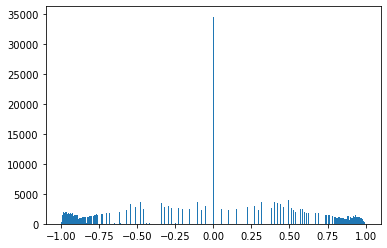

In [ ]:
plt.hist(training_comments_sent['compound'], bins = 500)
training_comments_sent['compound'].describe()
training_comments_sent['compound'].median()
training_comments_sent['compound'].mean()

create the target variable

In [ ]:
### create response classes:

training_comments_sent['sent_class'] = np.where(training_comments_sent['compound']>= training_comments_sent['compound'].median(), 1, -1)
# 1 for positive and neutral, -1 for negative

**Building the TF-IDF Matrix**

In [ ]:
# TF-IDF Scores

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(    min_df=2,
                            use_idf=True,
                            analyzer='word',
                            preprocessor=dummy_fun,
                            tokenizer=dummy_fun
                            )

tfidf_matrix   = tfidf.fit_transform(training_comments_sent['cleaned_text'])
tfidf_matrix.shape
tfidf_matrix.data = np.round(tfidf_matrix.data, 3)

In [ ]:
tfidf_matrix.shape

(387009, 91772)

**Logistic Regression (Classification)**

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(tfidf_matrix,
                                                    training_comments_sent["sent_class"],
                                                    stratify = np.array(training_comments_sent["sent_class"]),
                                                    train_size=0.75)


X_train.shape,y_train.shape,X_test.shape,y_test.shape

((290256, 91772), (290256,), (96753, 91772), (96753,))

In [ ]:
lr = LogisticRegression(C=0.4, class_weight= "balanced", solver="lbfgs",max_iter=1000)
lr.fit(X=X_train, y=y_train)
y_preds = lr.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          -1       0.94      0.90      0.92     47194
           1       0.90      0.95      0.93     49559

    accuracy                           0.92     96753
   macro avg       0.92      0.92      0.92     96753
weighted avg       0.92      0.92      0.92     96753



In [ ]:
# grid search

C_grid_search = np.linspace(1, 10, 10)
lr_grid       = GridSearchCV(estimator= lr,
                              param_grid=dict(C = C_grid_search),
                              scoring="f1",
                              cv = 3,
                             verbose=2)
lr_grid.fit(X_train, y_train)
print(lr_grid.best_score_)
best_hyperparameter = lr_grid.best_estimator_.C

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............................................C=1.0; total time=  21.0s
[CV] END ..............................................C=1.0; total time=  19.5s
[CV] END ..............................................C=1.0; total time=  20.4s
[CV] END ..............................................C=2.0; total time=  27.9s
[CV] END ..............................................C=2.0; total time=  19.4s
[CV] END ..............................................C=2.0; total time=  26.6s
[CV] END ..............................................C=3.0; total time=  30.0s
[CV] END ..............................................C=3.0; total time=  32.8s
[CV] END ..............................................C=3.0; total time=  32.5s
[CV] END ..............................................C=4.0; total time=  38.5s
[CV] END ..............................................C=4.0; total time=  37.4s
[CV] END .......................................

In [ ]:
print(best_hyperparameter)

10.0


In [ ]:
lr_best_hyperparameter = LogisticRegression(C=best_hyperparameter, class_weight= "balanced", solver="lbfgs",max_iter=1000)
lr_best_hyperparameter.fit(X=X_train, y=y_train)
y_preds = lr_best_hyperparameter.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.95     47194
           1       0.95      0.97      0.96     49559

    accuracy                           0.96     96753
   macro avg       0.96      0.96      0.96     96753
weighted avg       0.96      0.96      0.96     96753



**Naive Bayes**

In [ ]:
alpha = np.linspace(1, 100, 100)
nb_grid = GridSearchCV(estimator= MultinomialNB(), # take the csr_matrix
                       param_grid=dict( alpha = alpha),
                      scoring="f1",
                      cv = 3,
                       verbose = 2)
nb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ..........................................alpha=2.0; total time=   0.2s
[CV] END ..........................................alpha=2.0; total time=   0.2s
[CV] END ..........................................alpha=2.0; total time=   0.2s
[CV] END ..........................................alpha=3.0; total time=   0.2s
[CV] END ..........................................alpha=3.0; total time=   0.2s
[CV] END ..........................................alpha=3.0; total time=   0.2s
[CV] END ..........................................alpha=4.0; total time=   0.2s
[CV] END ..........................................alpha=4.0; total time=   0.2s
[CV] END .....................................

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='f1', verbose=2)

In [ ]:
print(nb_grid.best_score_)

0.8052380963161206


In [ ]:
nb_grid_best_hyperparameter = nb_grid.best_estimator_.alpha
nb_grid_best_hyperparameter

98.0

In [ ]:
nb_best_hyper = MultinomialNB(alpha = nb_grid_best_hyperparameter)
nb_best_hyper.fit(X_train, y_train)

MultinomialNB(alpha=98.0)

In [ ]:
np_y_preds = nb_best_hyper.predict(X_test)
print(classification_report(y_test, np_y_preds))

              precision    recall  f1-score   support

          -1       0.78      0.85      0.81     47194
           1       0.84      0.77      0.80     49559

    accuracy                           0.81     96753
   macro avg       0.81      0.81      0.81     96753
weighted avg       0.81      0.81      0.81     96753



In [ ]:
training_comments_sent['sent_class'].value_counts()

 1    198233
-1    188776
Name: sent_class, dtype: int64

# **MERGING ARTICLES & COMMENTS**

In [ ]:
frames=[training_comments_final_full,training_comments_sent.loc[:,['sent_class']]]
training_comments_final_full_sent=pd.concat(frames,axis=1)

In [ ]:
training_comments_final_full_sent.columns&articles.columns #columns in common 

Index(['articleID', 'newDesk', 'sectionName'], dtype='object')

In [ ]:
merged=pd.merge(articles,training_comments_final_full_sent,on='articleID')
merged=merged.drop(columns=['newDesk_y','sectionName_y'])
merged.shape

(385613, 22)

# **CONTROVERSIAL TOPICS**

In [ ]:
merged.columns

Index(['Unnamed: 0', 'articleID', 'keywords', 'newDesk_x', 'printPage',
       'pubDate', 'sectionName_x', 'snippet', 'articleWordCount',
       'approveDate', 'commentBody', 'commentID', 'createDate',
       'editorsSelection', 'inReplyTo', 'recommendations', 'replyCount',
       'updateDate', 'userID', 'binary_class', 'lemmatized_final',
       'sent_class'],
      dtype='object')

In [ ]:
# take only columns to be used in visualization
merged2=merged.loc[:,['commentID','sectionName_x','newDesk_x','binary_class','sent_class']]

In [ ]:
#controversial sectionName
# articles have been grouped by sectionName and binary_class of the comments, and for each group percentages have been added as a new column

cont_sectionname=merged2.groupby(['sectionName_x','binary_class'],as_index=False).count().sort_values('commentID',ascending=False).drop(columns=['sent_class','newDesk_x'])
cont_sectionname['percent_of_total']=cont_sectionname['commentID'].apply(lambda x:x/cont_sectionname['commentID'].sum()).round(2)


In [ ]:
#controversial newDesk
# articles have been grouped by sectionName and binary_class of the comments, and for each group percentages have been added as a new column
cont_newdesk=merged2.groupby(['newDesk_x','binary_class'],as_index=False).count().sort_values('commentID',ascending=False).drop(columns=['sent_class','sectionName_x'])
cont_newdesk['percent_of_total']=cont_newdesk['commentID'].apply(lambda x:100*x/cont_sectionname['commentID'].sum()).round(2)

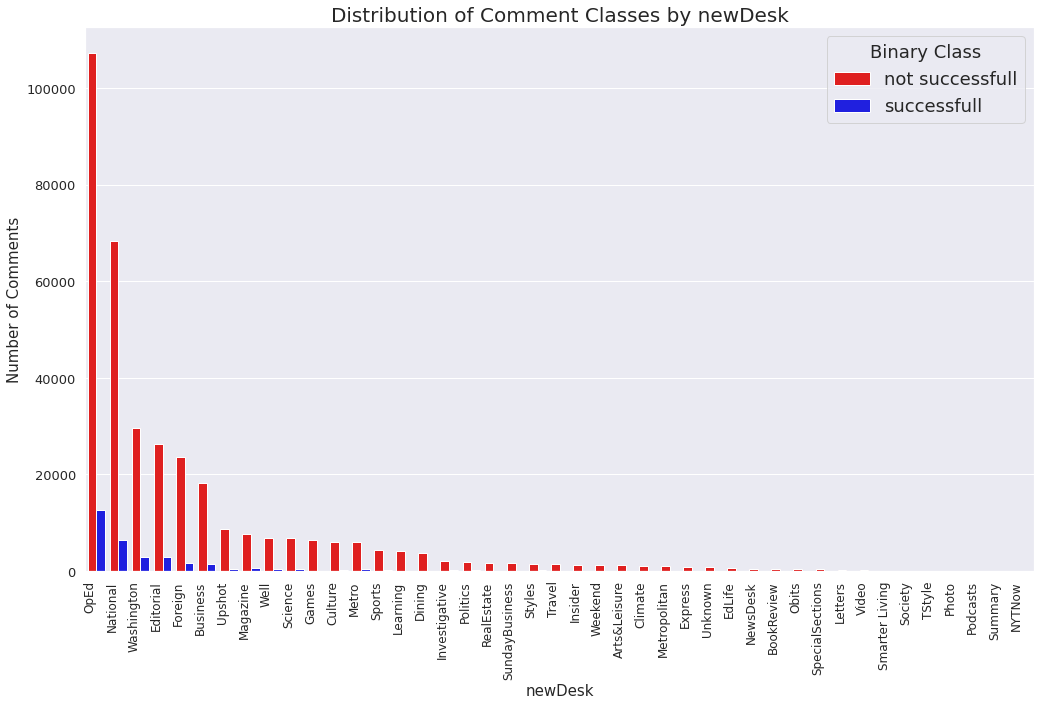

In [ ]:
#newDesk  #'Distribution of Comment Classes by newDesk

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(17,10)})

ax = sns.barplot(x='newDesk_x',y='commentID', 
                 data=cont_newdesk.sort_values('commentID',ascending=False),
                 hue='binary_class' ,
                         palette=["red","blue"],ci = None)
ax.set_xlabel('newDesk',fontsize=15)
ax.set_ylabel('Number of Comments',fontsize=15)
plt.title('Distribution of Comment Classes by newDesk', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=13)

labels=["not successfull","successfull"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Binary Class",fontsize=18,loc='upper right',title_fontsize='18')

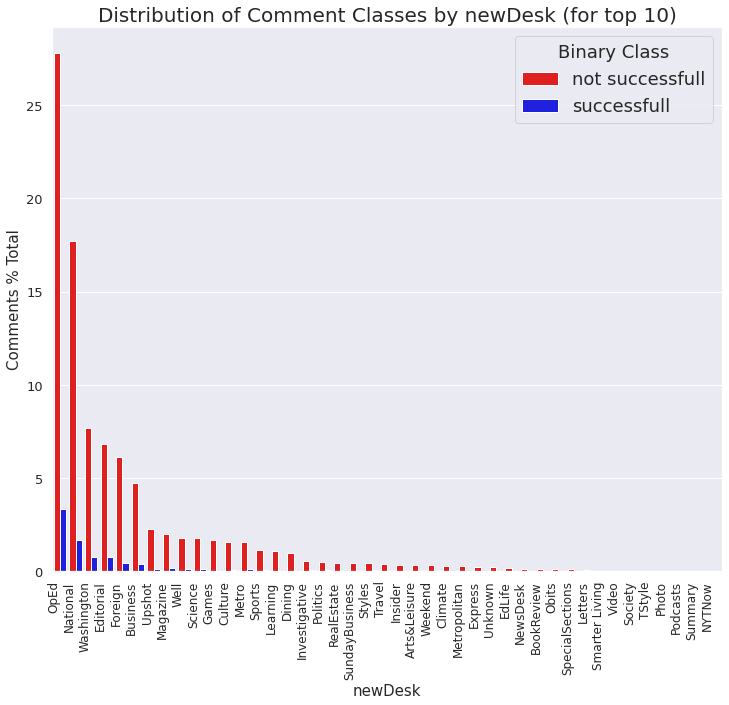

In [ ]:
#newDesk  Distribution of Comment Classes by newDesk (#PERCENTAGES)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,10)})

ax = sns.barplot(x='newDesk_x',y='percent_of_total', 
                 data=cont_newdesk.sort_values('percent_of_total',ascending=False),
                 hue='binary_class' ,
                         palette=["red","blue"],ci = None)

ax.set_xlabel('newDesk',fontsize=15)
ax.set_ylabel('Comments % Total',fontsize=15)
#plt.ylim(0, 100)
plt.title('Distribution of Comment Classes by newDesk (for top 10)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=13)

labels=["not successfull","successfull"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Binary Class",fontsize=18,loc='upper right',title_fontsize='18')



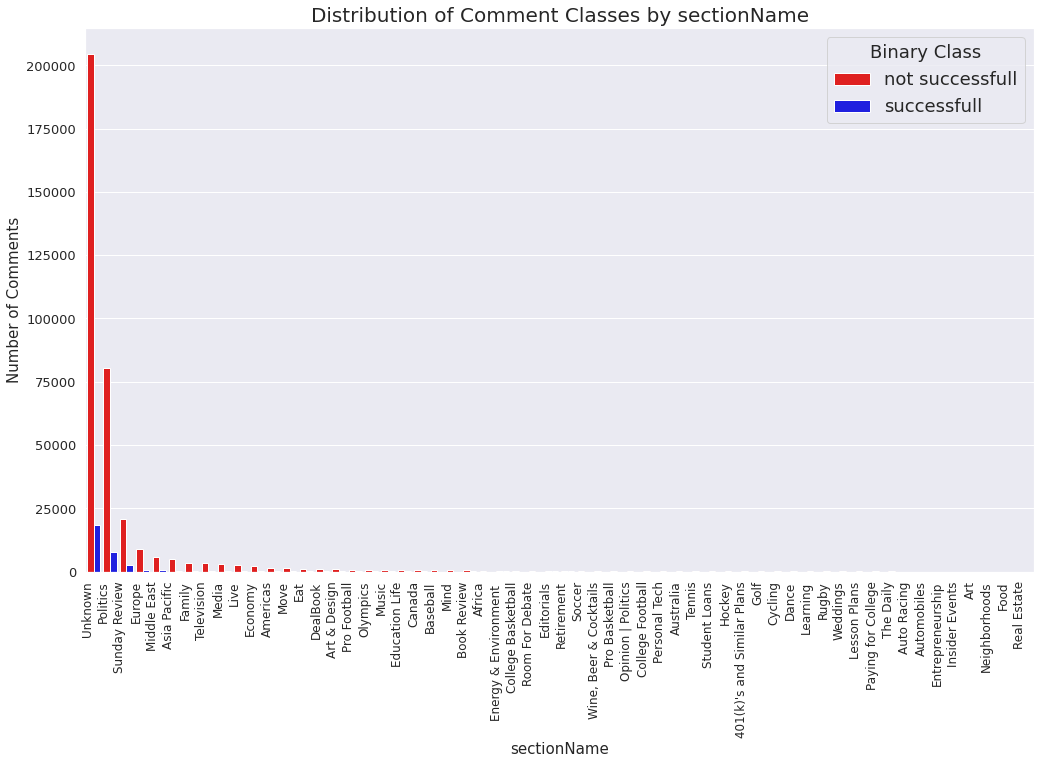

In [ ]:
#sectionName  #Distribution of Comment Classes by sectionName
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(17,10)})

ax = sns.barplot(x='sectionName_x',y='commentID', 
                 data=cont_sectionname.sort_values('commentID',ascending=False),
                 hue='binary_class' ,
                         palette=["red","blue"],ci = None)

ax.set_xlabel('sectionName',fontsize=15)
ax.set_ylabel('Number of Comments',fontsize=15)
plt.title('Distribution of Comment Classes by sectionName', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=13)

labels=["not successfull","successfull"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Binary Class",fontsize=18,loc='upper right',title_fontsize='18')

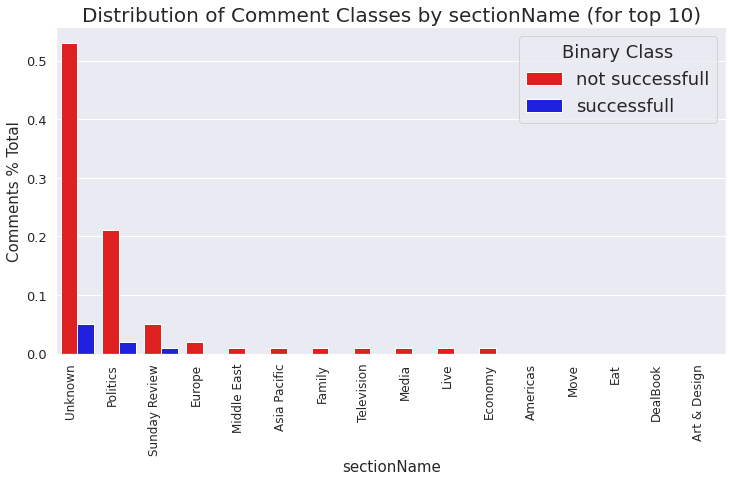

In [ ]:
#sectionName #PERCENTAGES #Distribution of Comment Classes by sectionName
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

ax = sns.barplot(x='sectionName_x',y='percent_of_total', 
                 data=cont_sectionname.head(20),
                 hue='binary_class' ,
                         palette=["red","blue"],ci = None)

ax.set_xlabel('sectionName',fontsize=15)
ax.set_ylabel('Comments % Total',fontsize=15)
#plt.ylim(0, 1)
plt.title('Distribution of Comment Classes by sectionName (for top 10)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=13)

labels=["not successfull","successfull"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Binary Class",fontsize=18,loc='upper right',title_fontsize='18')

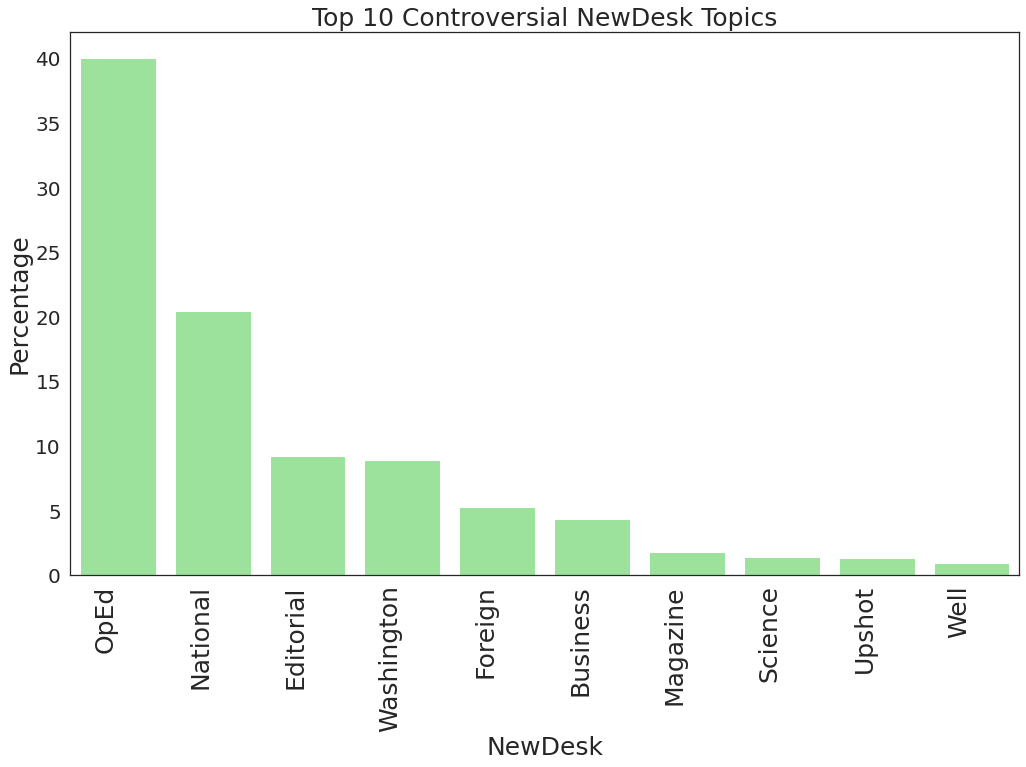

In [ ]:
#NewDesk
sns.set_theme(style="white")


ax = sns.barplot(x='newDesk_x',y='percent_of_total', data=only_succ_comments2.head(10), 
                         palette=["lightgreen"])

ax.set_xlabel('NewDesk',fontsize=25)
ax.set_ylabel('Percentage',fontsize=25)
plt.title('Top 10 Controversial NewDesk Topics', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=20)

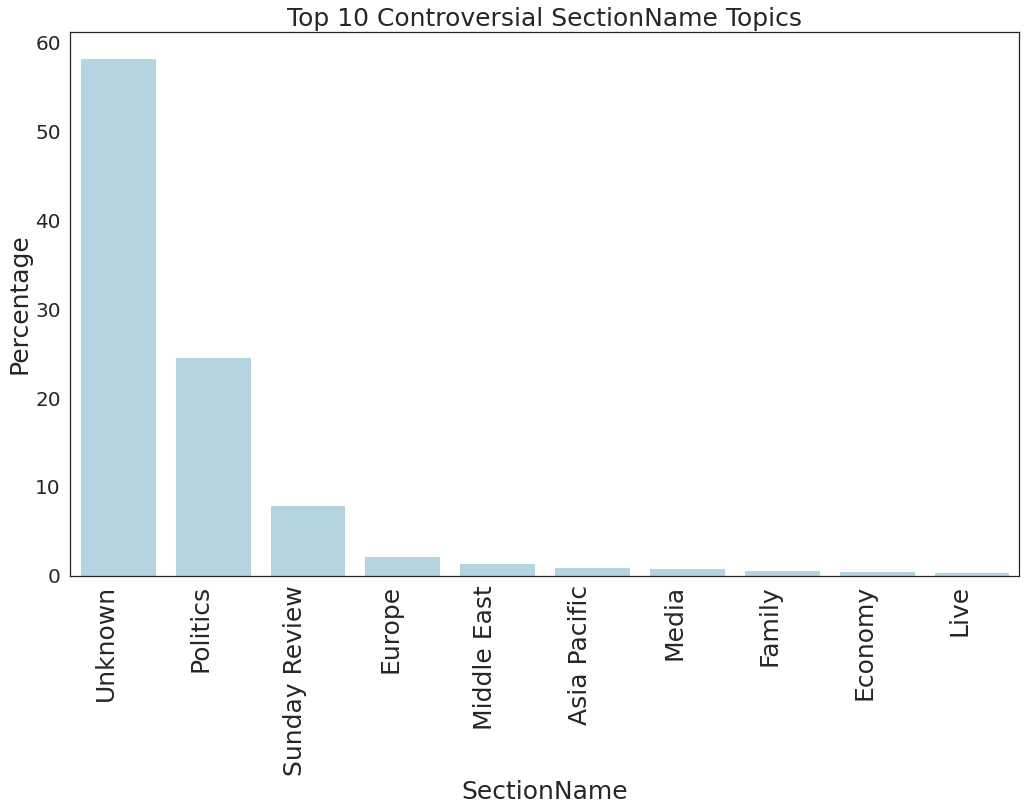

In [ ]:
#SectionName
sns.set_theme(style="white")


ax = sns.barplot(x='sectionName_x',y='percent_of_total', data=only_succ_comments.head(10), 
                         palette=["lightblue"])

ax.set_xlabel('SectionName',fontsize=25)
ax.set_ylabel('Percentage',fontsize=25)
plt.title('Top 10 Controversial SectionName Topics', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=20)

In [ ]:
# taking only successful comments where binary_class==1  (for newDesk)
only_succ_comments2=cont_newdesk[cont_newdesk['binary_class']==1]
only_succ_comments2['percent_of_total']=only_succ_comments2['commentID'].apply(lambda x:100*x/only_succ_comments2['commentID'].sum()).round(2)


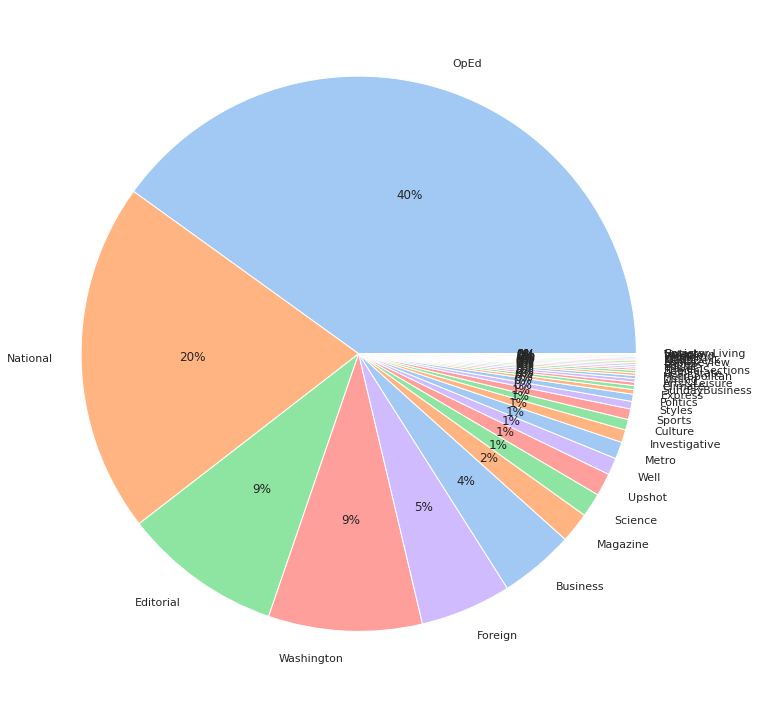

In [ ]:
#SUCCESSFUL COMMENTS BY TOPIC (NEWDESK)
data = only_succ_comments2['percent_of_total']
labels = only_succ_comments2['newDesk_x']

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.tight_layout()
plt.show()

In [ ]:
# taking only successful comments where binary_class==1 (for sectionName)
only_succ_comments=cont_sectionname[cont_sectionname['binary_class']==1]
only_succ_comments['percent_of_total']=only_succ_comments['commentID'].apply(lambda x:100*x/only_succ_comments['commentID'].sum()).round(2)

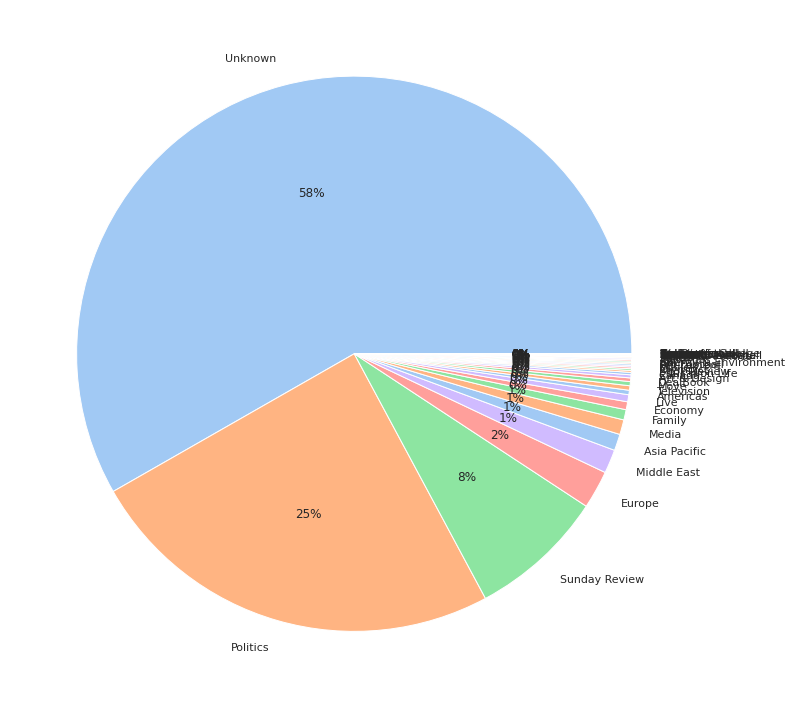

In [ ]:
#SUCCESSFUL COMMENTS BY TOPIC (SECTION NAME)
data = only_succ_comments['percent_of_total']
labels = only_succ_comments['sectionName_x']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.tight_layout()
plt.show()

In [ ]:
# Percentage of newDesk topics of Total, and withing group percentages of sectionName topics

Percentages=merged2[merged['binary_class']==1]
Percentages=pd.DataFrame(merged2.groupby(['newDesk_x','sectionName_x'])['commentID'].count())
Percentages['newDesk% of Total'] = (Percentages.commentID / Percentages.commentID.sum() * 100)
Percentages['SectionName% of newDesk'] = (Percentages.commentID/ (Percentages.groupby(level=0).commentID.transform(sum)) * 100)
Percentages.loc['total', :] = Percentages.sum().values
Percentages.drop(['total']).sort_values(by='commentID',ascending=False)

,,commentID,newDesk% of Total,SectionName% of newDesk
newDesk_x,sectionName_x,,,
OpEd,Unknown,98706.0,25.597166,82.310560
National,Politics,51245.0,13.289230,68.546014
Washington,Politics,30262.0,7.847764,93.113846
Editorial,Unknown,26795.0,6.948677,91.559884
National,Unknown,22258.0,5.772108,29.772606
OpEd,Sunday Review,21055.0,5.460137,17.557685
Business,Unknown,11245.0,2.916136,57.182812
Upshot,Unknown,9139.0,2.369993,100.000000
Foreign,Europe,8269.0,2.144378,32.731663


## **SENTIMENT OF CONTROVERSIAL TOPICS**

In [ ]:
merged2_for_vis=merged2.groupby(['sectionName_x','binary_class','sent_class'],as_index=False).count().sort_values('commentID',ascending=False).drop(columns=['newDesk_x'])
merged3_for_vis=merged2.groupby(['newDesk_x','binary_class','sent_class'],as_index=False).count().sort_values('commentID',ascending=False).drop(columns=['sectionName_x'])


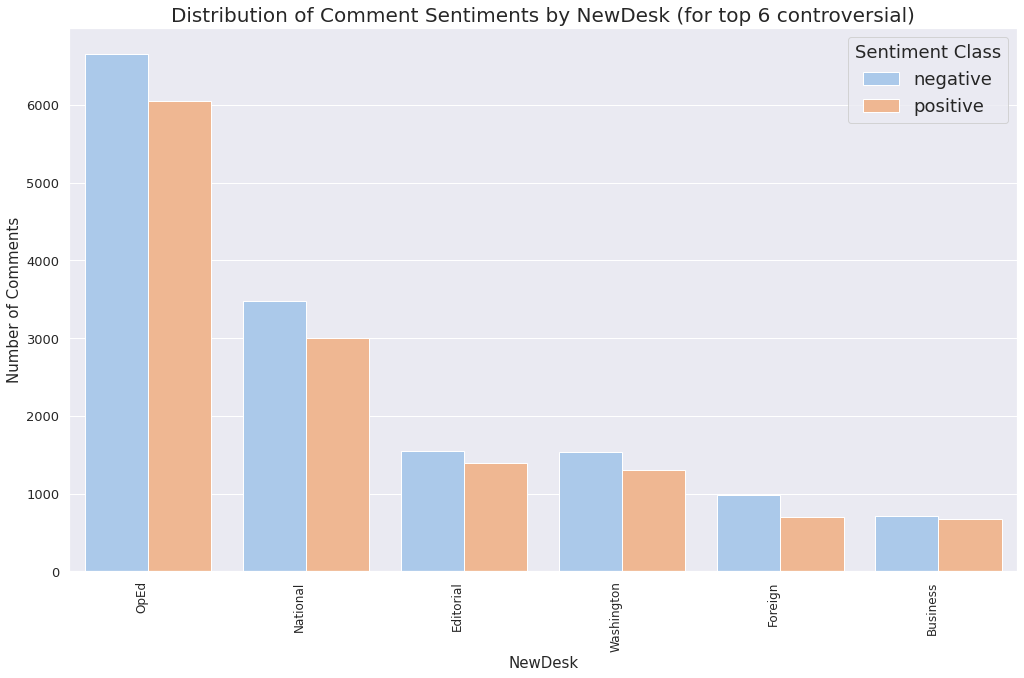

In [ ]:

#NewDesk
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(17,10)})

ax = sns.barplot(x='newDesk_x',y='commentID', 
                 data=merged3_for_vis[merged3_for_vis['binary_class'] ==1].sort_values('commentID',ascending=False).head(12),
                 hue='sent_class' ,
                         palette=sns.color_palette('pastel'),ci = None)
ax.set_xlabel('NewDesk',fontsize=15)
ax.set_ylabel('Number of Comments',fontsize=15)
plt.title('Distribution of Comment Sentiments by NewDesk (for top 6 controversial)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=13)

labels=["negative","positive"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Sentiment Class",fontsize=18,loc='upper right',title_fontsize='18')


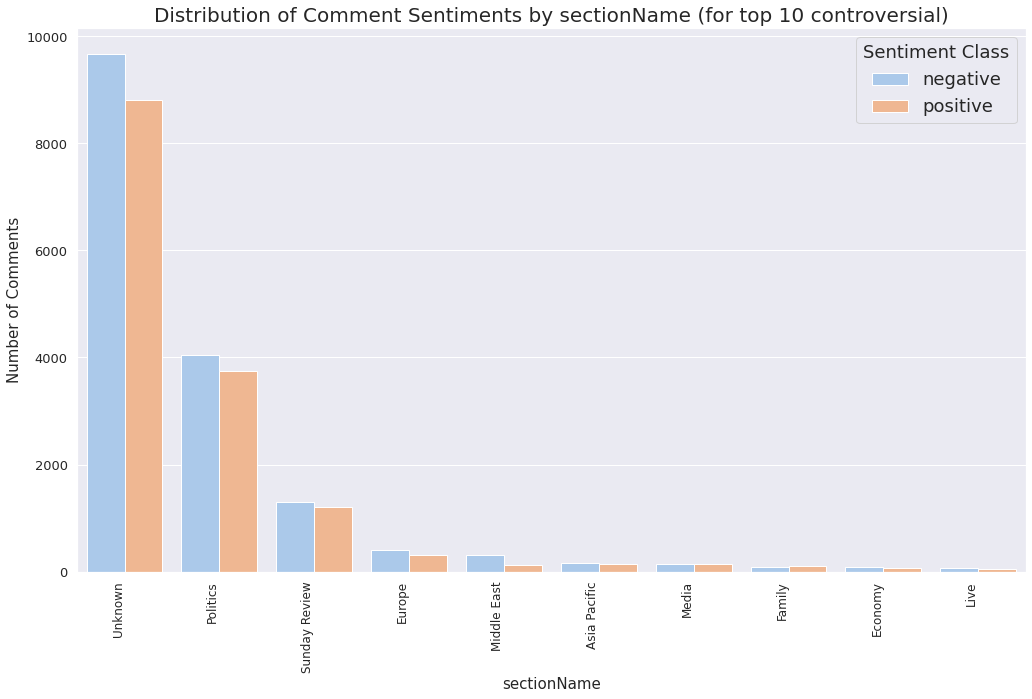

In [ ]:
#sectionName 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(17,10)})
ax = sns.barplot(x='sectionName_x',y='commentID', 
                 data=merged2_for_vis[merged2_for_vis['binary_class'] ==1].sort_values('commentID',ascending=False).head(20),
                 hue='sent_class' ,
                         palette=sns.color_palette('pastel'),ci = None)
ax.set_xlabel('sectionName',fontsize=15)
ax.set_ylabel('Number of Comments',fontsize=15)
plt.title('Distribution of Comment Sentiments by sectionName (for top 10 controversial)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,rotation=90, horizontalalignment='right')
ax.tick_params(axis="y", labelsize=13)

labels=["negative","positive"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Sentiment Class",fontsize=18,loc='upper right',title_fontsize='18')